In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ap_data.csv')
df.head()

,price,room_count,quadrature,floor_text,floor,region_text,region,year,flat_toilet,flat_balcony,flat_balcony_g,flat_door,inet_type,flat_parking,live_furniture,flat_flooring,ceiling
0,31000000,2,60.0,8/12,0.67,Алатауский р-н,1.000000e-10,2019,совмещенный,no_info,no_info,металлическая,ADSL,рядом охраняемая стоянка,частично,ламинат,2.7
1,25000000,2,47.0,3/9,0.33,Алатауский р-н,1.000000e-10,2011,совмещенный,no_info,no_info,металлическая,проводной,no_info,без мебели,ламинат,2.7
2,1861400000,6,521.1,20/22,0.91,Бостандыкский р-н,1.000000e+00,2015,2 с/у и более,лоджия,да,металлическая,no_info,паркинг,частично,паркет,2.8
3,1861400000,6,521.0,20/22,0.91,Бостандыкский р-н,1.000000e+00,2015,no_info,no_info,no_info,no_info,no_info,no_info,no_info,no_info,2.8
4,1861400000,5,521.0,20/22,0.91,Алматы,NaN,2015,2 с/у и более,несколько балконов или лоджий,no_info,металлическая,no_info,no_info,no_info,паркет,2.8


In [3]:
df.isna().sum()

price                 0
room_count            0
quadrature            0
floor_text            0
floor                 0
region_text           0
region             1051
year                  0
flat_toilet        1819
flat_balcony       1819
flat_balcony_g     1819
flat_door          1819
inet_type          1819
flat_parking       1819
live_furniture     1819
flat_flooring      1819
ceiling           11580
dtype: int64

In [4]:
region_mean = df['region'].mean()
df['region'].fillna(region_mean, inplace=True)

In [5]:
ceiling_mean = round(df['ceiling'].mean(), 2)
df['ceiling'].fillna(ceiling_mean, inplace=True)

In [6]:
print(df.shape)
df.isna().sum()

(36111, 17)


price                0
room_count           0
quadrature           0
floor_text           0
floor                0
region_text          0
region               0
year                 0
flat_toilet       1819
flat_balcony      1819
flat_balcony_g    1819
flat_door         1819
inet_type         1819
flat_parking      1819
live_furniture    1819
flat_flooring     1819
ceiling              0
dtype: int64

In [7]:
df.dropna(inplace=True)
print(df.shape)
df.isna().sum()

(34292, 17)


price             0
room_count        0
quadrature        0
floor_text        0
floor             0
region_text       0
region            0
year              0
flat_toilet       0
flat_balcony      0
flat_balcony_g    0
flat_door         0
inet_type         0
flat_parking      0
live_furniture    0
flat_flooring     0
ceiling           0
dtype: int64

In [8]:
df.columns

Index(['price', 'room_count', 'quadrature', 'floor_text', 'floor',
       'region_text', 'region', 'year', 'flat_toilet', 'flat_balcony',
       'flat_balcony_g', 'flat_door', 'inet_type', 'flat_parking',
       'live_furniture', 'flat_flooring', 'ceiling'],
      dtype='object')

In [9]:
columns_to_encode = ['flat_toilet', 'flat_balcony', 'flat_balcony_g', 'flat_door', 'inet_type', 'flat_parking', 'live_furniture', 'flat_flooring']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df

,price,room_count,quadrature,floor_text,floor,region_text,region,year,ceiling,flat_toilet_no_info,...,live_furniture_без мебели,live_furniture_полностью,live_furniture_частично,flat_flooring_дерево,flat_flooring_ковролан,flat_flooring_ламинат,flat_flooring_линолеум,flat_flooring_паркет,flat_flooring_плитка,flat_flooring_пробковый
0,31000000,2,60.0,8/12,0.67,Алатауский р-н,1.000000e-10,2019,2.70,False,...,False,False,True,False,False,True,False,False,False,False
1,25000000,2,47.0,3/9,0.33,Алатауский р-н,1.000000e-10,2011,2.70,False,...,True,False,False,False,False,True,False,False,False,False
2,1861400000,6,521.1,20/22,0.91,Бостандыкский р-н,1.000000e+00,2015,2.80,False,...,False,False,True,False,False,False,False,True,False,False
3,1861400000,6,521.0,20/22,0.91,Бостандыкский р-н,1.000000e+00,2015,2.80,True,...,False,False,False,False,False,False,False,False,False,False
4,1861400000,5,521.0,20/22,0.91,Алматы,4.855513e-01,2015,2.80,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36105,39500000,3,59.0,3/5,0.60,Бостандыкский р-н,1.000000e+00,1975,2.87,True,...,False,False,False,False,False,False,False,False,False,False
36107,39500000,3,59.0,2/5,0.40,Бостандыкский р-н,1.000000e+00,1983,2.87,True,...,False,False,False,False,False,False,False,False,False,False
36108,39500000,3,66.0,4/5,0.80,Алмалинский р-н,7.500000e-02,1980,2.75,True,...,False,False,True,False,False,True,False,False,False,False
36109,39500000,2,50.2,2/5,0.40,Алмалинский р-н,7.500000e-02,1977,2.87,True,...,False,False,True,False,False,False,False,True,False,False


In [10]:
df = df.select_dtypes(exclude='object')
df

,price,room_count,quadrature,floor,region,year,ceiling,flat_toilet_no_info,flat_toilet_нет,flat_toilet_раздельный,...,live_furniture_без мебели,live_furniture_полностью,live_furniture_частично,flat_flooring_дерево,flat_flooring_ковролан,flat_flooring_ламинат,flat_flooring_линолеум,flat_flooring_паркет,flat_flooring_плитка,flat_flooring_пробковый
0,31000000,2,60.0,0.67,1.000000e-10,2019,2.70,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,25000000,2,47.0,0.33,1.000000e-10,2011,2.70,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,1861400000,6,521.1,0.91,1.000000e+00,2015,2.80,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1861400000,6,521.0,0.91,1.000000e+00,2015,2.80,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1861400000,5,521.0,0.91,4.855513e-01,2015,2.80,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36105,39500000,3,59.0,0.60,1.000000e+00,1975,2.87,True,False,False,...,False,False,False,False,False,False,False,False,False,False
36107,39500000,3,59.0,0.40,1.000000e+00,1983,2.87,True,False,False,...,False,False,False,False,False,False,False,False,False,False
36108,39500000,3,66.0,0.80,7.500000e-02,1980,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
36109,39500000,2,50.2,0.40,7.500000e-02,1977,2.87,True,False,False,...,False,False,True,False,False,False,False,True,False,False


In [11]:
df['log_quadrature'] = np.log1p(df['quadrature'])
df['log_region'] = np.log1p(df['region'])
df['log_ceiling'] = np.log1p(df['ceiling'])
df

,price,room_count,quadrature,floor,region,year,ceiling,flat_toilet_no_info,flat_toilet_нет,flat_toilet_раздельный,...,flat_flooring_дерево,flat_flooring_ковролан,flat_flooring_ламинат,flat_flooring_линолеум,flat_flooring_паркет,flat_flooring_плитка,flat_flooring_пробковый,log_quadrature,log_region,log_ceiling
0,31000000,2,60.0,0.67,1.000000e-10,2019,2.70,False,False,False,...,False,False,True,False,False,False,False,4.110874,1.000000e-10,1.308333
1,25000000,2,47.0,0.33,1.000000e-10,2011,2.70,False,False,False,...,False,False,True,False,False,False,False,3.871201,1.000000e-10,1.308333
2,1861400000,6,521.1,0.91,1.000000e+00,2015,2.80,False,False,False,...,False,False,False,False,True,False,False,6.257859,6.931472e-01,1.335001
3,1861400000,6,521.0,0.91,1.000000e+00,2015,2.80,True,False,False,...,False,False,False,False,False,False,False,6.257668,6.931472e-01,1.335001
4,1861400000,5,521.0,0.91,4.855513e-01,2015,2.80,False,False,False,...,False,False,False,False,True,False,False,6.257668,3.957859e-01,1.335001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36105,39500000,3,59.0,0.60,1.000000e+00,1975,2.87,True,False,False,...,False,False,False,False,False,False,False,4.094345,6.931472e-01,1.353255
36107,39500000,3,59.0,0.40,1.000000e+00,1983,2.87,True,False,False,...,False,False,False,False,False,False,False,4.094345,6.931472e-01,1.353255
36108,39500000,3,66.0,0.80,7.500000e-02,1980,2.75,True,False,False,...,False,False,True,False,False,False,False,4.204693,7.232066e-02,1.321756
36109,39500000,2,50.2,0.40,7.500000e-02,1977,2.87,True,False,False,...,False,False,False,False,True,False,False,3.935740,7.232066e-02,1.353255


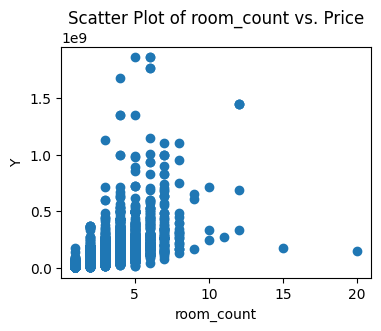

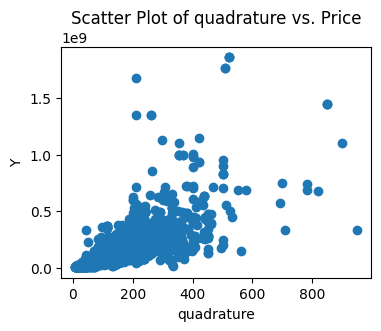

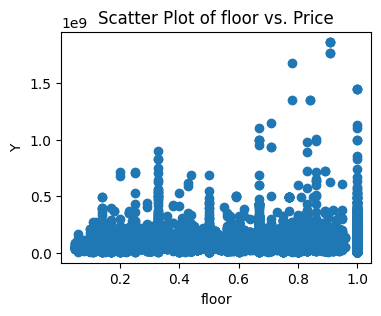

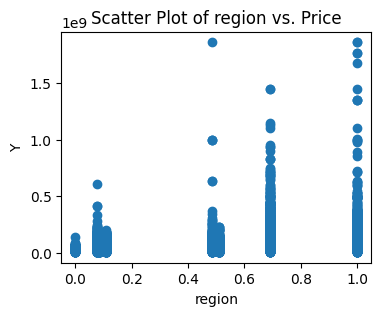

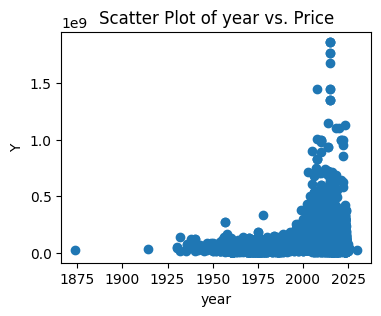

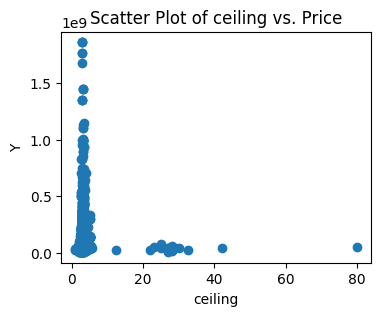

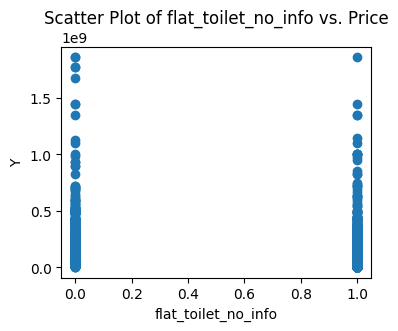

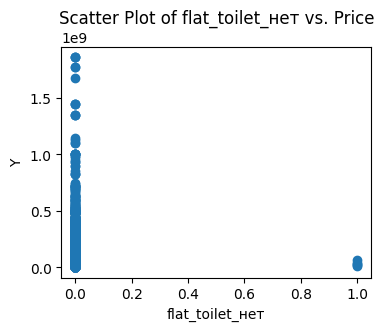

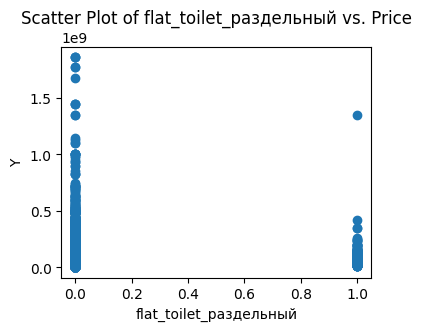

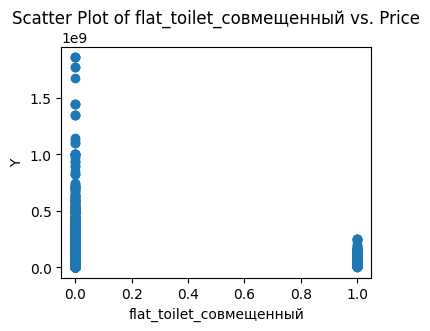

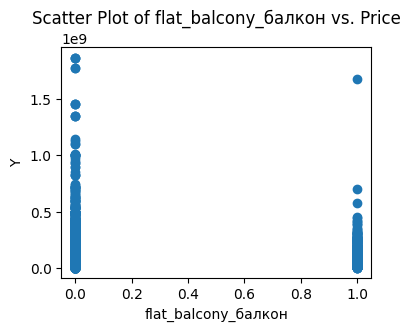

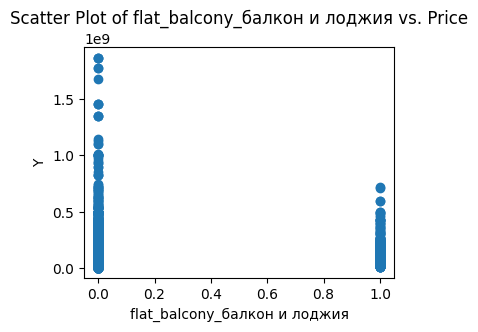

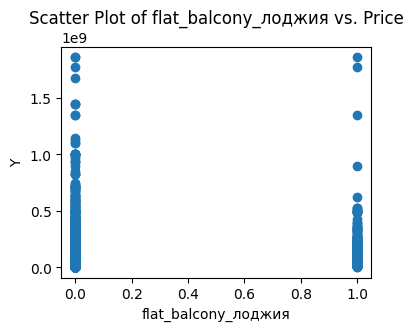

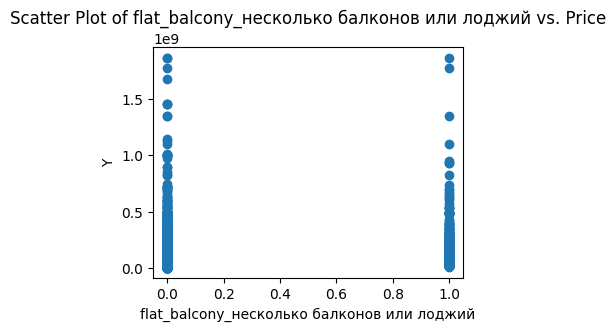

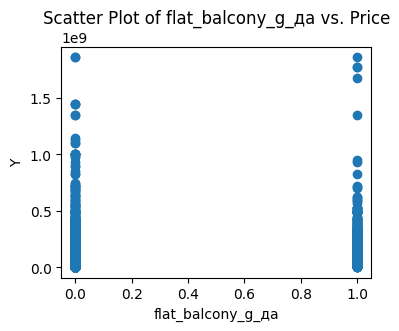

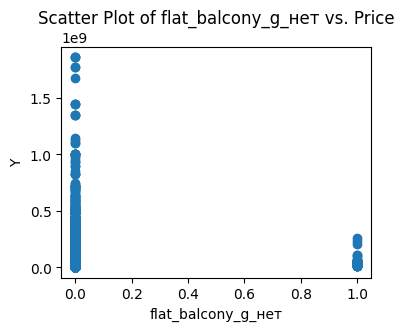

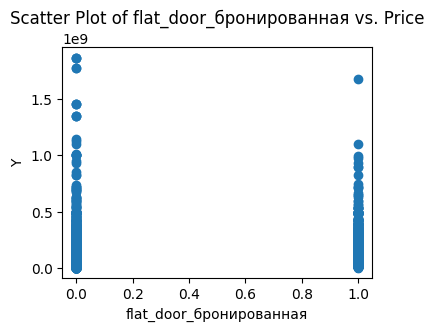

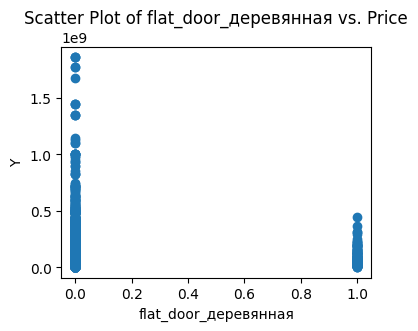

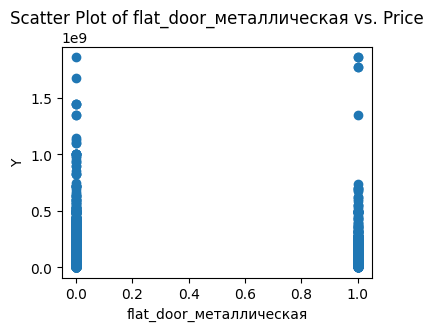

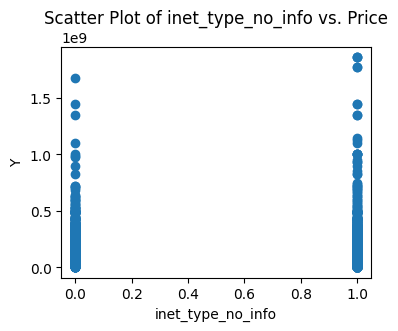

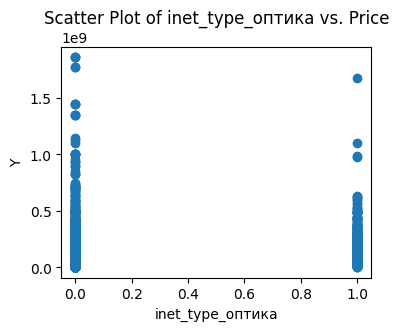

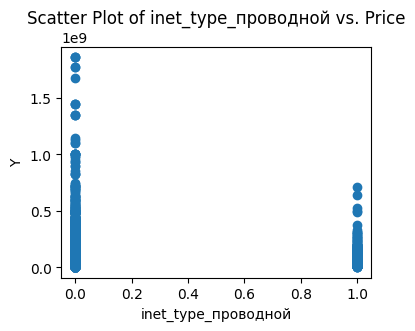

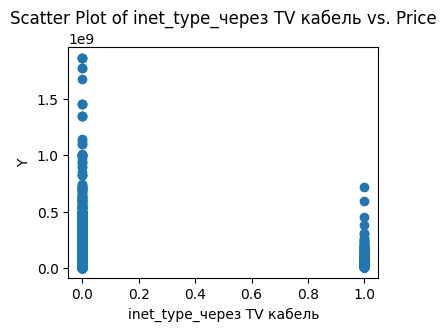

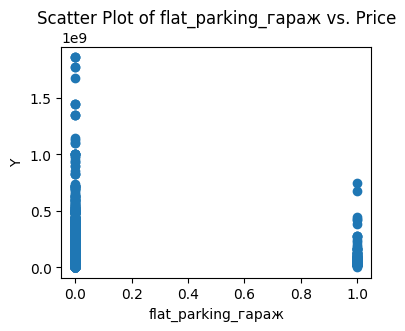

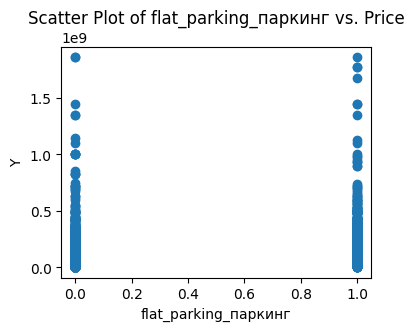

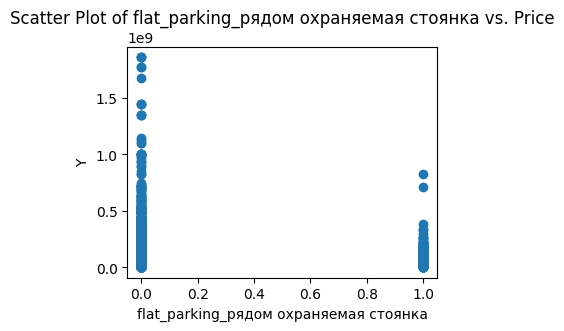

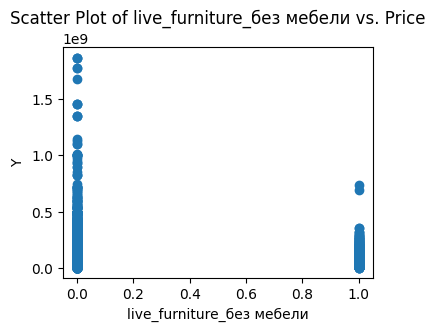

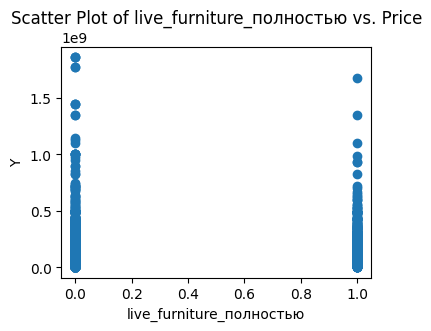

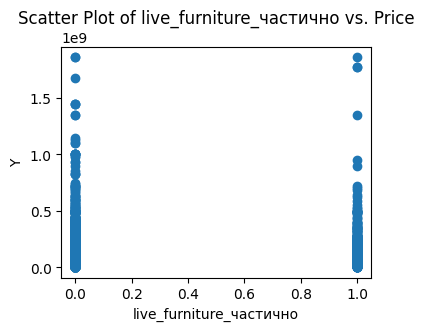

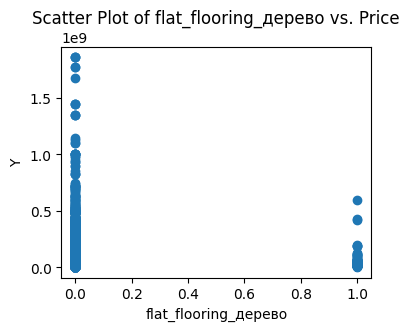

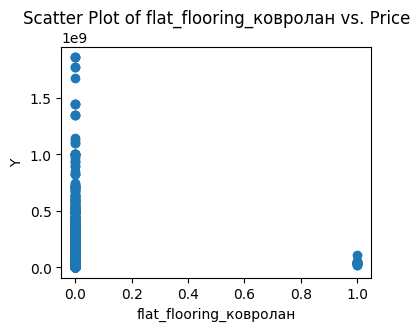

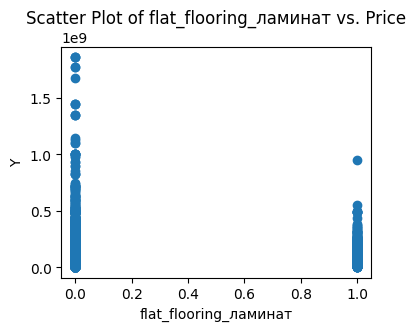

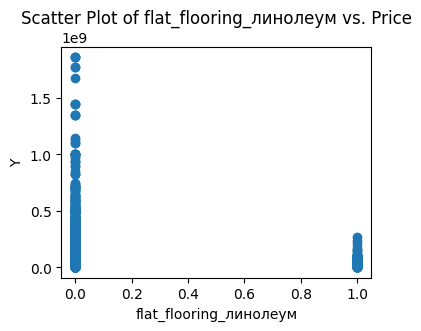

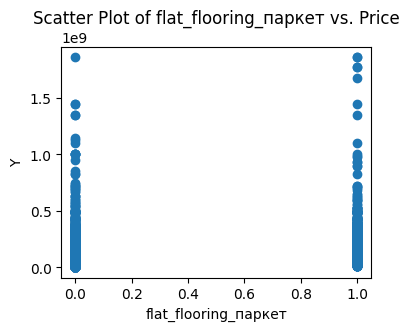

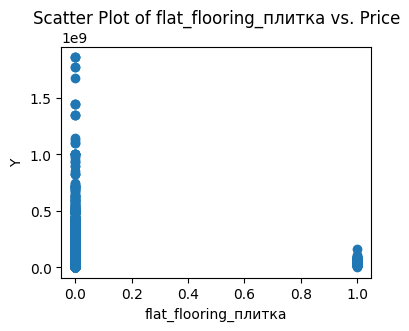

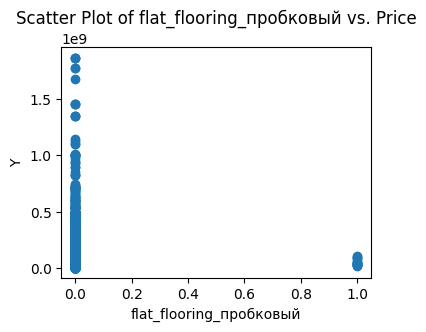

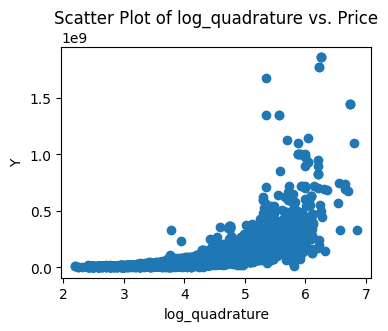

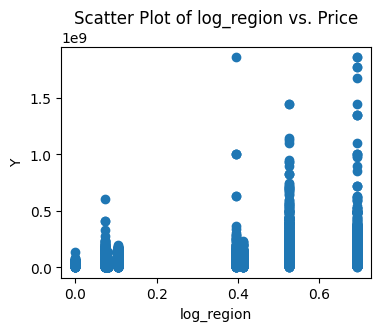

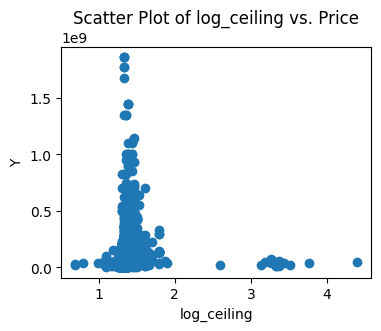

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.columns

for x_column in numerical_columns:
    if x_column != 'price':
        plt.figure(figsize=(4, 3))
        plt.scatter(df[x_column], df['price'])
        plt.xlabel(x_column)
        plt.ylabel('Y')
        plt.title(f'Scatter Plot of {x_column} vs. Price')
        plt.show()

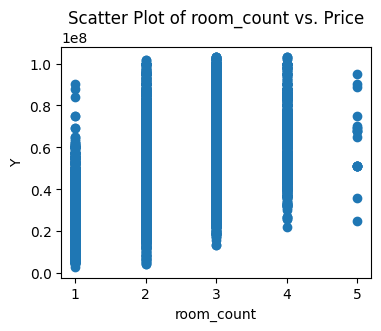

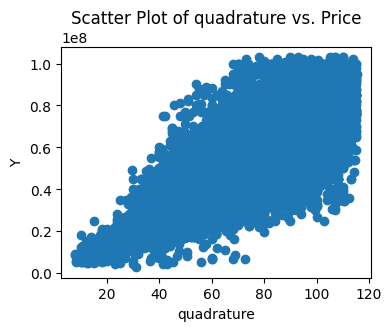

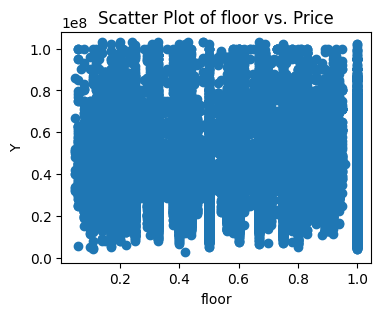

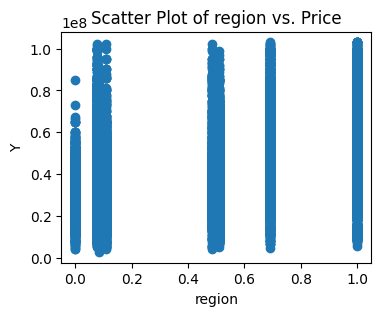

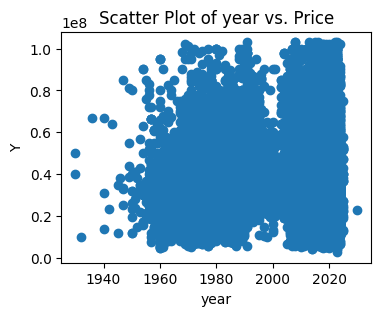

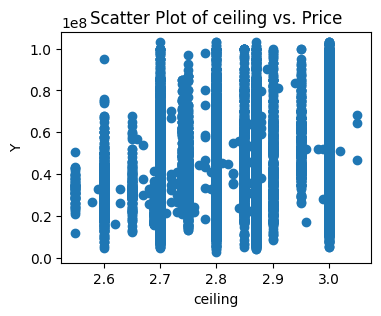

In [13]:
numerical_columns = ['price', 'room_count', 'quadrature', 'floor', 'region', 'year', 'ceiling']
# For each column, drop the outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Once outliers are removed, visualize your data
for x_column in numerical_columns:
    if x_column != 'price':
        plt.figure(figsize=(4, 3))
        plt.scatter(df[x_column], df['price'])
        plt.xlabel(x_column)
        plt.ylabel('Y')
        plt.title(f'Scatter Plot of {x_column} vs. Price')
        plt.show()


In [14]:
df.shape

(28841, 40)

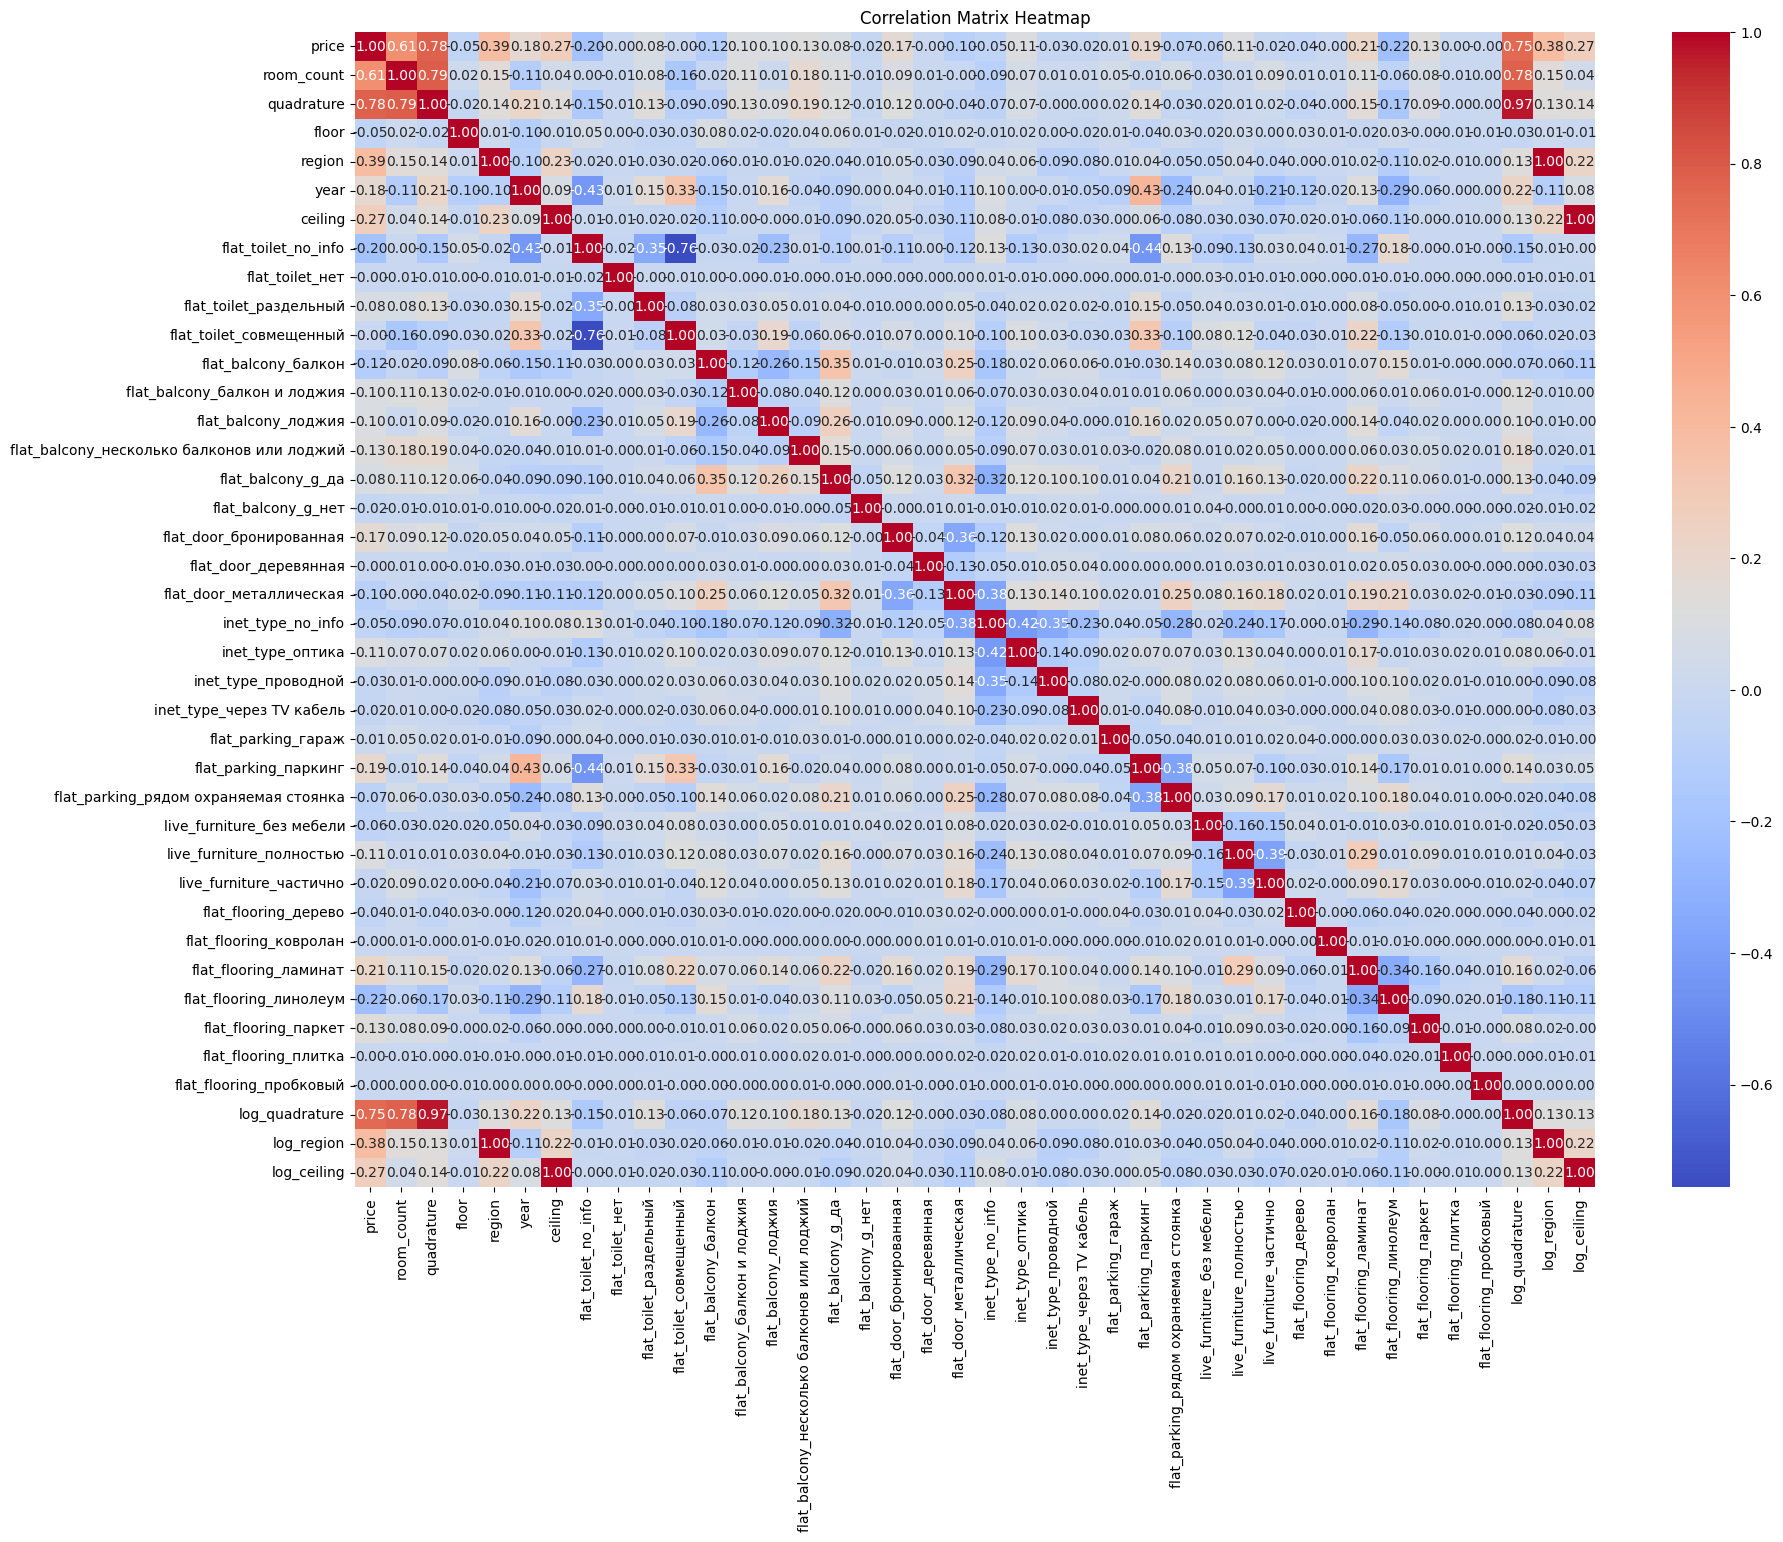

In [15]:
# Assuming you have a DataFrame called 'df'
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title("Correlation Matrix Heatmap")

# Show the heatmap
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_normalize = ['room_count', 'quadrature', 'year', 'ceiling']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [17]:
from sklearn.preprocessing import MinMaxScaler
import random

def get_user_input():
    # Get input from user
    user_data = {}
    user_data['room_count'] = float(input("Enter room count: "))
    user_data['quadrature'] = float(input("Enter quadrature: "))
    user_data['floor'] = float(input("Enter floor coeffcoefficient: "))
    user_data['region'] = float(input("Enter region coefficient: "))
    user_data['year'] = float(input("Enter year: "))
    user_data['ceiling'] = float(input("Enter ceiling height (e.g., 2.7 for 2.7m): "))

    options_mapping = {
        'flat_toilet': ['no_info', 'нет', 'раздельный', 'совмещенный'],
        'flat_balcony': ['балкон', 'балкон и лоджия', 'лоджия', 'несколько балконов или лоджий'],
        'flat_balcony_g': ['да', 'нет'],
        'flat_door': ['бронированная', 'деревянная', 'металлическая'],
        'inet_type': ['no_info', 'оптика', 'проводной', 'через TV кабель'],
        'flat_parking': ['гараж', 'паркинг', 'рядом охраняемая стоянка'],
        'live_furniture': ['без мебели', 'полностью', 'частично'],
        'flat_flooring': ['дерево', 'ковролан', 'ламинат', 'линолеум', 'паркет', 'плитка', 'пробковый']
    }

    for prefix, options in options_mapping.items():
        chosen_option = random.choice(options)
        values = [1 if opt == chosen_option else 0 for opt in options]
        cols = [str(prefix)+'_'+ str(opt) for opt in options]
        # col = "'" + "', '".join(map(str, cols))+"'"
        for i in range(len(values)):
            user_data[cols[i]] = values[i]  # Fill missing columns with default or most common value
            
    # Create a DataFrame with the correct data types
    user_input_df = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)
    user_input_df = user_input_df.astype(float)  # Ensure all columns are float64 type
    
    # Update the DataFrame with the user's input
    for feature in user_data:
        user_input_df.at[0, feature] = user_data[feature]
    
    # Normalize and standardize the user's input
    user_input_df[features_to_normalize] = scaler.transform(user_input_df[features_to_normalize])
    user_input_df = stdScaler.transform(user_input_df)
    
    return user_input_df
    
def predict_price(user_input_df):
        
    # Predict price
    price_pred = model.predict(user_input_df)
    return price_pred[0]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

# Split the data into training and testing sets
X = df.drop('price', axis=1)
# print(X.columns)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

X_train_scaled = stdScaler.fit_transform(X_train)
X_test_scaled = stdScaler.transform(X_test)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=13),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Neural Network": MLPRegressor(batch_size=32, learning_rate_init=0.01, max_iter=10000, random_state=42)
}

# Train and evaluate each model

user_input_df = get_user_input()

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # print(f"{name}: Mean Squared Error: {mse}")
    print(f"{name}: Root Mean Squared Error: {rmse}")
    print(f"{name}: R² Score: {r2}")
    print()
    
    predicted_price = predict_price(user_input_df)
    print(f"Predicted Apartment Price: {predicted_price}")
    
        

Linear Regression: Root Mean Squared Error: 9274993.007380404
Linear Regression: R² Score: 0.732711129062396

Random Forest: Root Mean Squared Error: 8125240.839777467
Random Forest: R² Score: 0.7948714168833964

